## Notebook for creating plots in fMRI experiment

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import os
import pickle
import numpy as np

# sim_name = 'server_shuffle_data_output_validation_seeds'
sim_name = 'run_with_optimization_methods'
modalities = 'LR-LR'
figures_path = f'figures/fmri/task_classification/{sim_name}'
summary_path = f'{figures_path}/summary'
os.makedirs(summary_path, exist_ok=True)


sns.set_style("whitegrid", {'grid.linestyle': '--'})  # Adjust grid style
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 20
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{newtxmath} \usepackage{newtxtext} \usepackage{newtxtext}'
plt.rcParams['font.serif'] = "Times New Roman"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '--'

font_name = "Times New Roman"  # Change to any other installed serif font if needed

# Set font properties using the font name
font_properties = font_manager.FontProperties(family=font_name, size=20)


In [17]:
# results_df1 = pd.read_csv(f'{figures_path}/best_all_{modalities}_{sim_name}_1nn.csv')
# results_df2 = pd.read_csv(f'../figures/fmri/task_classification/LR_LR_shuffle_batch_4554_dim_attempt3/best_all_{modalities}_LR_LR_shuffle_batch_4554_dim_attempt3_1nn.csv')
results_df = pd.read_csv(f'{figures_path}/results_merged.csv')

In [21]:
results_df[results_df['method'] == 'fimvc_via']


method  param1  param2  dim    t  train_percent  batch_size  batch  \
65520   fimvc_via    10.0     NaN    5  0.0           0.05        4554      0   
65521   fimvc_via    10.0     NaN   10  0.0           0.05        4554      0   
65522   fimvc_via    10.0     NaN   15  0.0           0.05        4554      0   
65523   fimvc_via    10.0     NaN   20  0.0           0.05        4554      0   
65524   fimvc_via    10.0     NaN   30  0.0           0.05        4554      0   
...           ...     ...     ...  ...  ...            ...         ...    ...   
155995  fimvc_via   100.0     NaN   60  0.0           0.70        4554      0   
155996  fimvc_via   100.0     NaN   70  0.0           0.70        4554      0   
155997  fimvc_via   100.0     NaN   80  0.0           0.70        4554      0   
155998  fimvc_via   100.0     NaN   90  0.0           0.70        4554      0   
155999  fimvc_via   100.0     NaN  100  0.0           0.70        4554      0   

        seed  zero_diag classifier  shuffle_subjects  valid_accuracy  \
65520      0      False        knn              True        0.125275   
65521      0      False        knn              True        0.320879   
65522      0      False        knn              True        0.336264   
65523      0      False        knn              True        0.105495   
65524      0      False        knn              True        0.105495   
...      ...        ...        ...               ...             ...   
155995   123      False        knn              True        0.553846   
155996   123      False        knn              True        0.446154   
155997   123      False        knn              True        0.378022   
155998   123      False        knn              True        0.334066   
155999   123      False        knn              True        0.285714   

        test_accuracy  silhouette_gt  silhouette_pred_test     run_time  
65520        0.109791      -0.271585             -1.000000  2473.573835  
65521        0.114957      -0.289828             -1.000000  2473.573835  
65522        0.221390      -0.292667             -1.000000  2473.573835  
65523        0.109532      -0.306841             -1.000000  2473.573835  
65524        0.109532      -0.328828             -1.000000  2473.573835  
...               ...            ...                   ...          ...  
155995       0.365532       0.026826             -0.023807  2637.036900  
155996       0.324918       0.018689             -0.021359  2637.036900  
155997       0.246981       0.011581             -0.028682  2637.036900  
155998       0.193194       0.007076             -0.022825  2637.036900  
155999       0.158068       0.002621             -0.020429  2637.036900  

[2520 rows x 17 columns]

In [4]:
results_df.columns

Index(['method', 'param1', 'param2', 'dim', 't', 'train_percent', 'batch_size',
       'batch', 'seed', 'zero_diag', 'classifier', 'shuffle_subjects',
       'valid_accuracy', 'test_accuracy', 'silhouette_gt',
       'silhouette_pred_test', 'run_time'],
      dtype='object')

In [39]:
# setup plot style
# methods_to_plot = ['ad', 'dm', 'nystrom', 'ncca', 'kcca', 'forward_only', 'ffbb']  # Replace with actual method names
reference_methods = ['ad', 'dm']  # methods for performance reference 
# competing_methods = ['nystrom', 'ncca', 'kcca_impute']  # competing methods under the same setting
competing_methods = ['nystrom', 'ncca', 'kcca_impute', 'apmc', 'fimvc_via']  # competing methods under the same setting
best_competing_methods = ['nystrom', 'ncca', 'apmc', 'fimvc_via']  # competing methods under the same setting
# competing_methods = ['nystrom', 'ncca', 'apmc']  # competing methods under the same setting
our_methods = ['forward_only', 'adm_plus']
# our_methods = ['backward_only', 'adm_plus']

method_names = {
    'ad': 'ADM',
    'ad_svd': 'ADM-SVD',
    'dm': 'DM',
    # 'nystrom': 'Nyström',
    'nystrom': 'Dov et al.',
    'apmc': 'APMC',
    'ncca': 'NCCA',
    'kcca_impute': 'KCCA',
    'forward_only': 'forward only',
    'backward_only': 'backward only',
    'adm_plus': 'ADM+',
    'ffbb': 'ADM+ (forward-backward)',
    'fimvc_via': 'FIMVC-VIA',
}

# Specify the color palette for different methods
palette_reference = {'ad': 'black', 'ad_svd': 'brown', 'dm': 'grey'}  # Reference methods: black and grey
palette_our_methods = {'forward_only': 'blue', 'ffbb': 'dodgerblue', 'adm_plus': 'dodgerblue', 'backward_only': 'cyan'}  # Our methods in shades of blue
palette_competing = {'nystrom': 'green', 'ncca': 'gold', 'kcca': 'violet', 
                     'kcca_impute': 'purple', 'apmc': 'salmon', 'fimvc_via': 'maroon'}  # Competing methods in other colors

# linestyle
linewidth = 3.5
errorbar = 'sd'

# fonts 
legend_fontsize = 26
label_fontsize = 26
tick_fontsize = 32


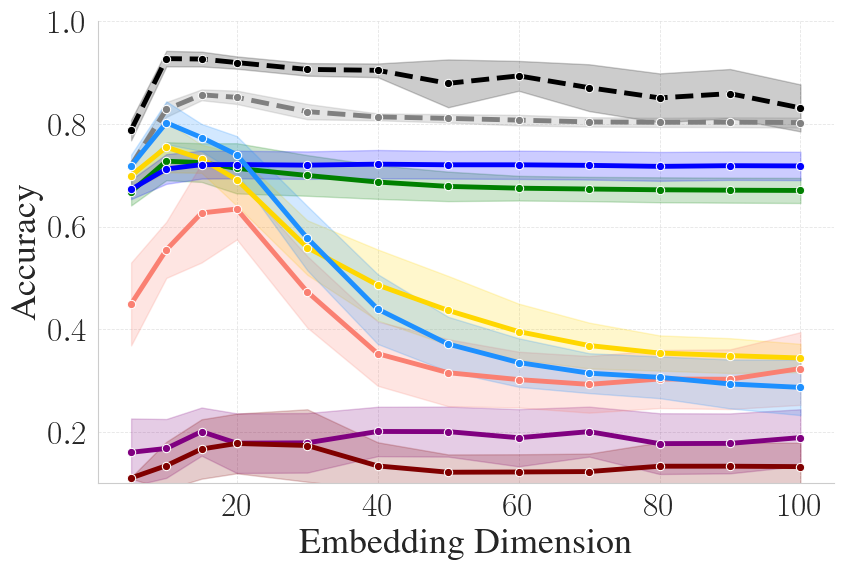

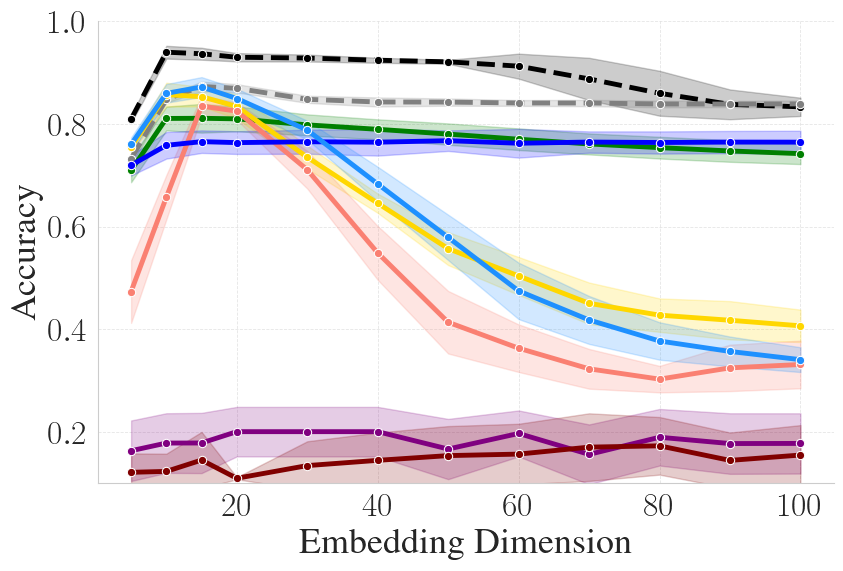

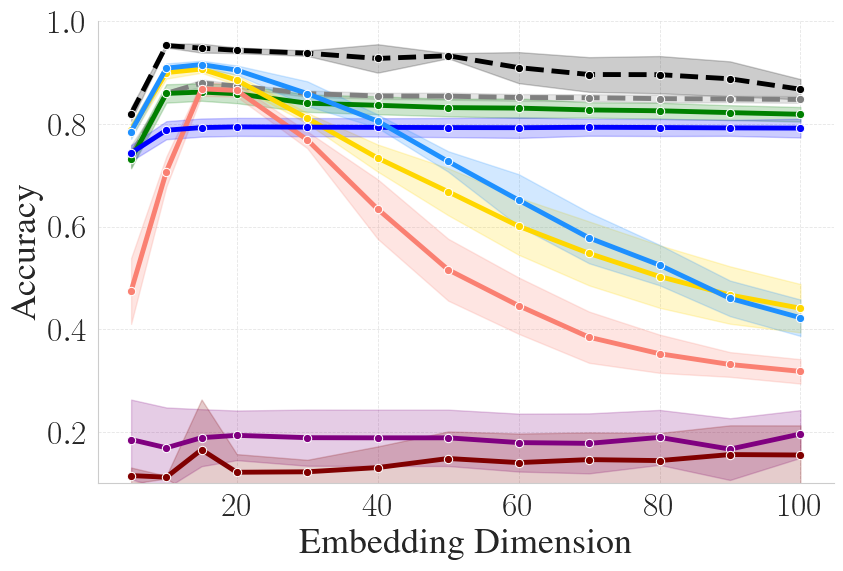

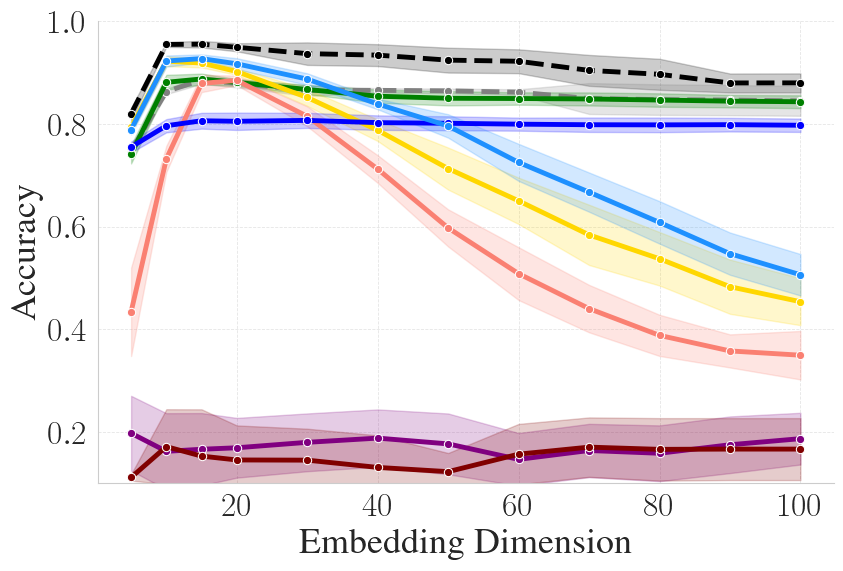

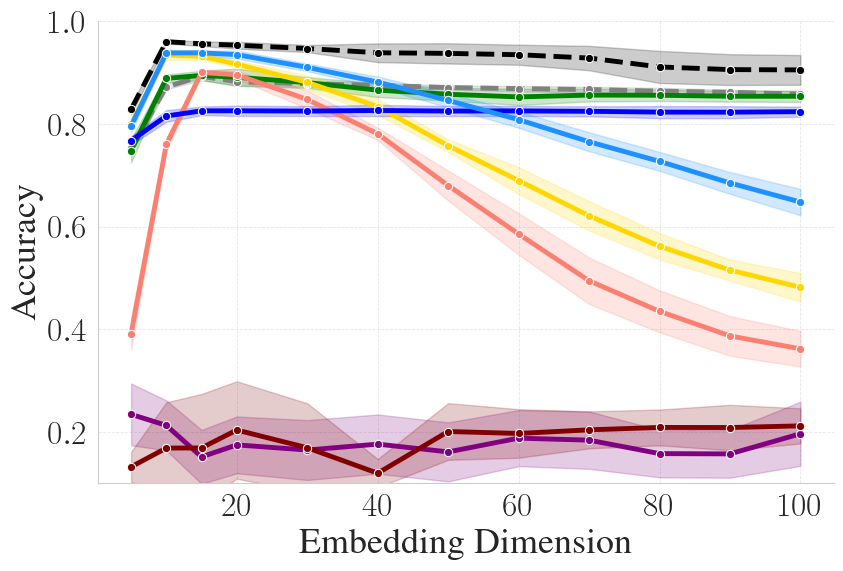

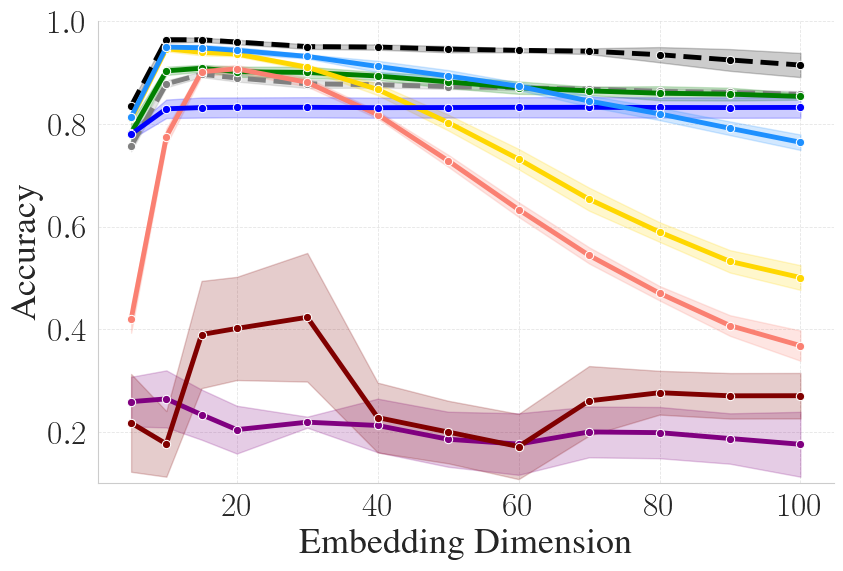

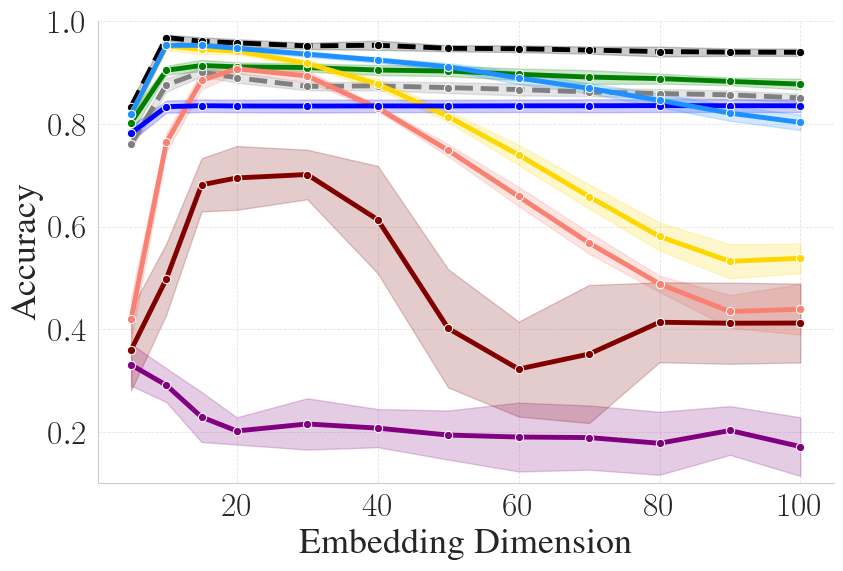

In [40]:
# Set a Seaborn theme for better aesthetics
# sns.set(style="whitegrid")


# Loop over each unique train_percent value
for train_percent in results_df['train_percent'].unique():
    plt.figure(figsize=(9.5, 6))

    # Plot for reference methods with dashed lines
    df_filtered = results_df[(results_df['train_percent'] == train_percent) &
                             (results_df['method'].isin(reference_methods))]
    df_filtered = df_filtered.loc[df_filtered.groupby(['method', 'dim', 'seed'])['valid_accuracy'].idxmax()]
    ax = sns.lineplot(data=df_filtered, x='dim', y='test_accuracy', hue='method',
                      marker='o', palette=palette_reference, linewidth=linewidth,
                      hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

    # Plot for competing methods
    df_filtered = results_df[(results_df['train_percent'] == train_percent) &
                             (results_df['method'].isin(competing_methods))]
    df_filtered = df_filtered.loc[df_filtered.groupby(['method', 'dim', 'seed'])['valid_accuracy'].idxmax()]
    ax = sns.lineplot(data=df_filtered, x='dim', y='test_accuracy', hue='method',
                      marker='o', palette=palette_competing, linewidth=linewidth,
                      hue_order=competing_methods, estimator='mean', errorbar=errorbar)

    # Plot for our methods
    df_filtered = results_df[(results_df['train_percent'] == train_percent) &
                             (results_df['method'].isin(our_methods))  & (results_df['t'] == 0.1)]
    df_filtered = df_filtered.loc[df_filtered.groupby(['method', 'dim', 'seed'])['valid_accuracy'].idxmax()]
    ax = sns.lineplot(data=df_filtered, x='dim', y='test_accuracy', hue='method',
                      marker='o', palette=palette_our_methods, linewidth=linewidth,
                      hue_order=our_methods, estimator='mean', errorbar=errorbar)

    # Plotting accuracy vs. dim for each selected method
    
    # , errorbar=('ci', 0) add for no error bars
    
    # Modify the legend with custom names
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [method_names[label] for label in labels]
    plt.legend(handles, labels, title_fontsize=legend_fontsize, fontsize=legend_fontsize, loc='lower right', frameon=True, prop=font_properties)
    
    # Enhancing the plot
    # plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
    plt.xlabel(r'Embedding Dimension', fontsize=label_fontsize)
    plt.ylabel(r'Accuracy', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
    plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.set_ylim([0.1, 1.0])
    ax.legend().set_visible(False)
    # Adding gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.6)
    
    # Remove the top and right spines for a cleaner look
    sns.despine()
    # plt.rcParams['text.usetex'] = False
    path_str = f'{summary_path}/acc_vs_dim_train_percent_{train_percent}'.replace('.', 'p')
    plt.savefig(f'{summary_path}/acc_vs_dim_train_percent_{train_percent}.pdf', dpi=300, format='pdf', bbox_inches='tight')

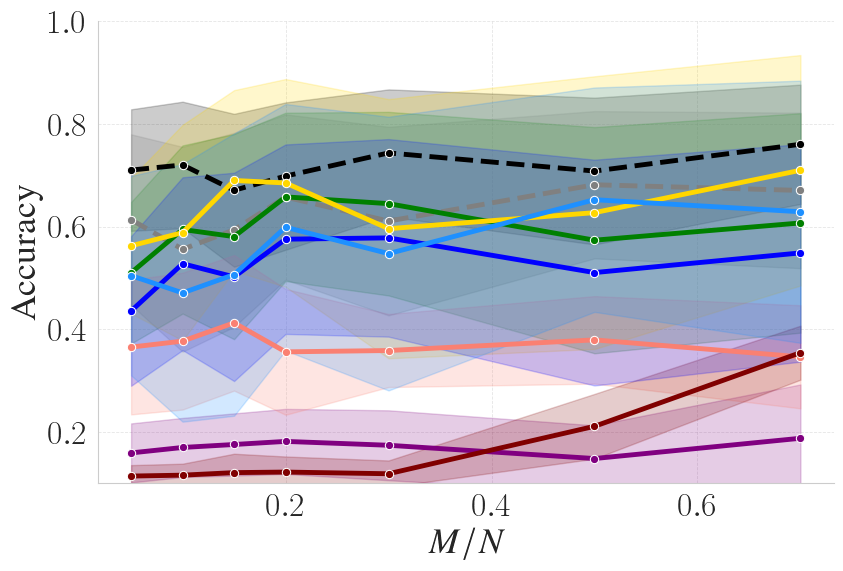

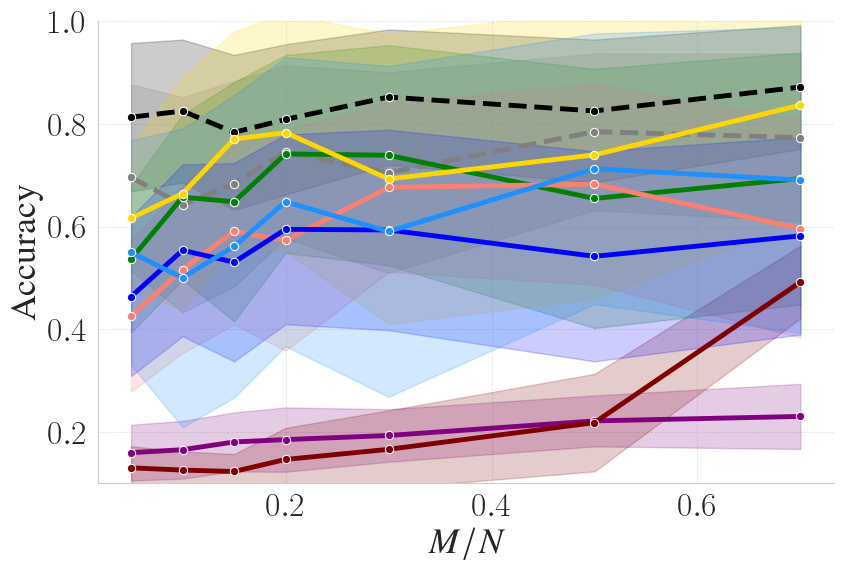

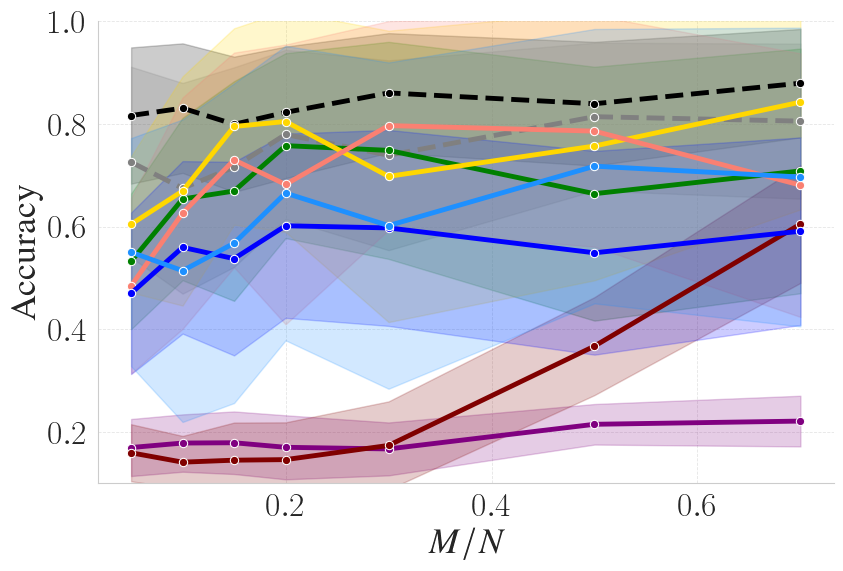

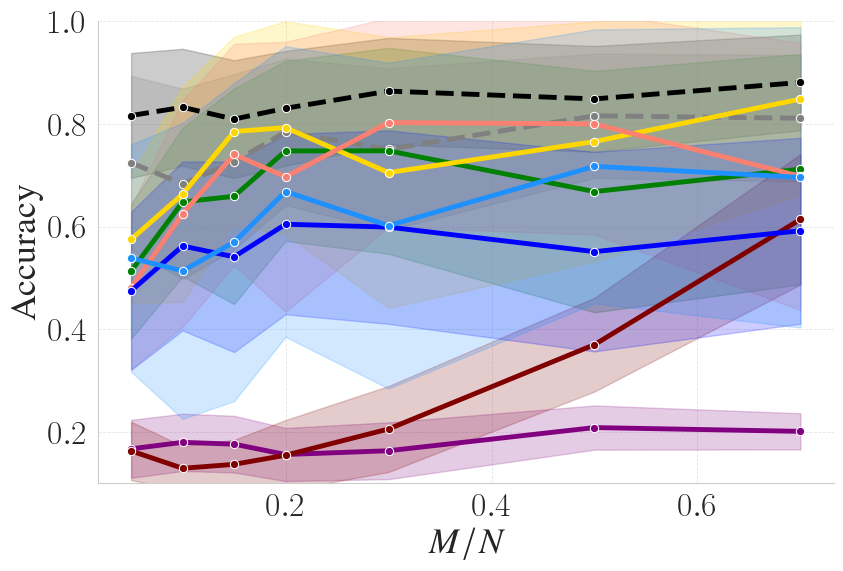

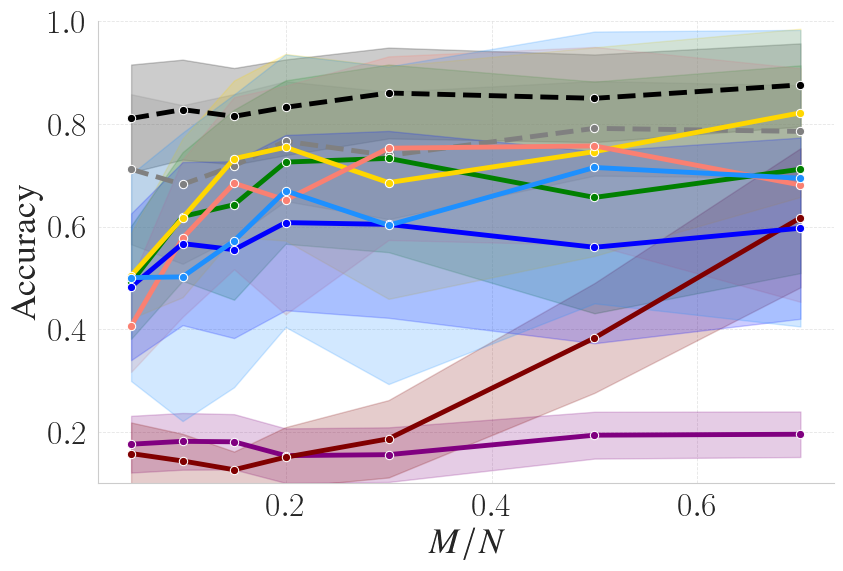

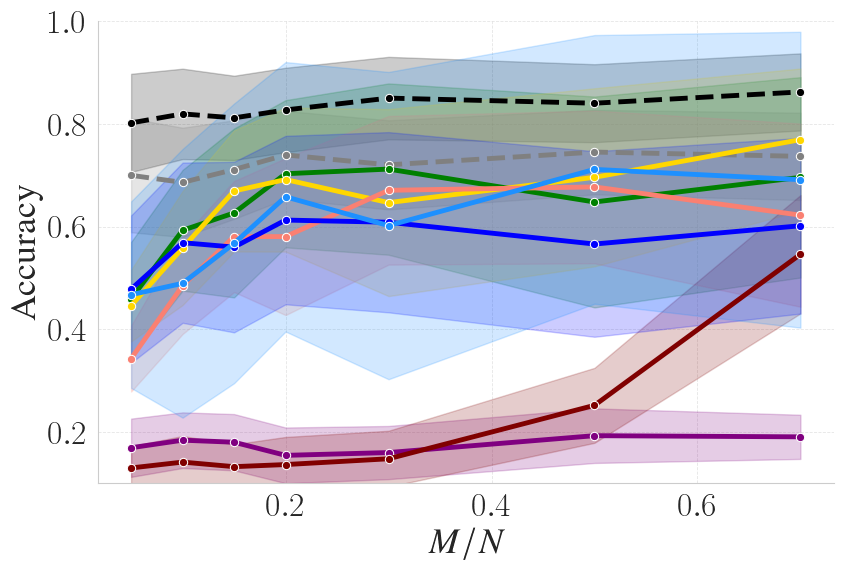

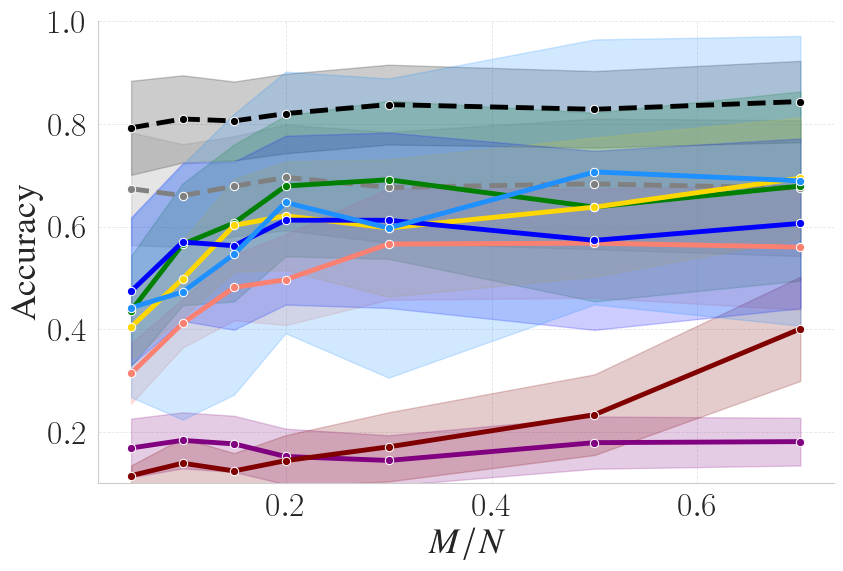

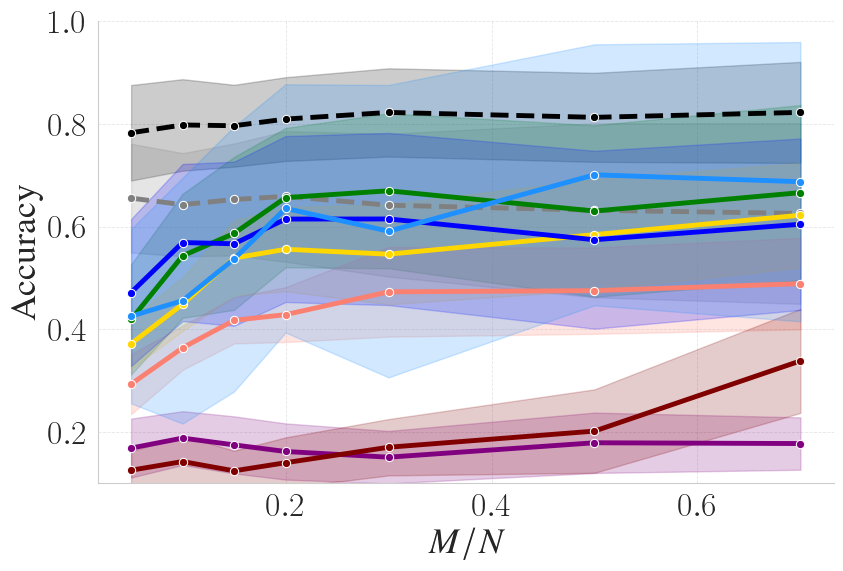

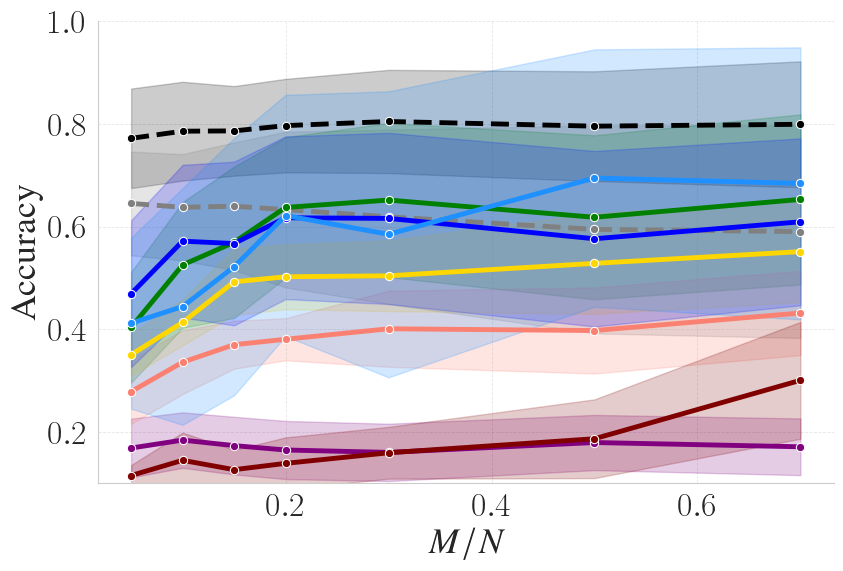

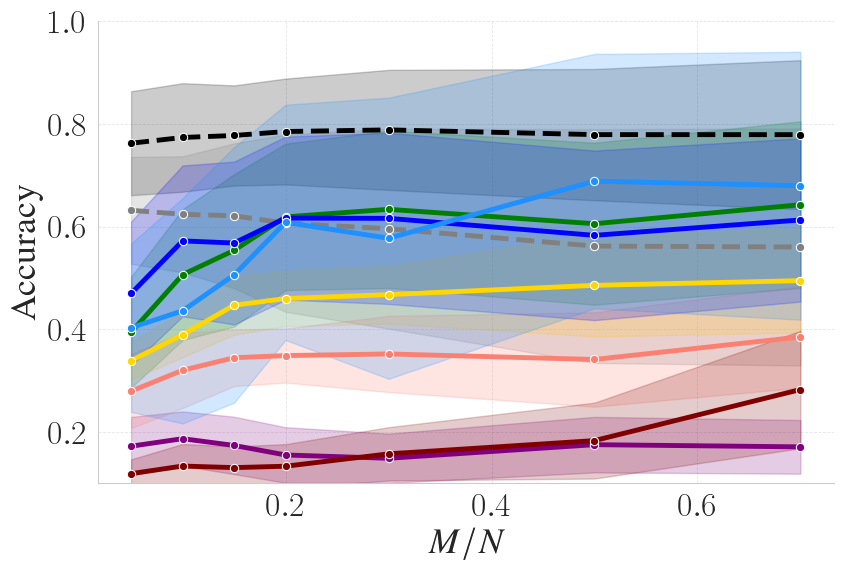

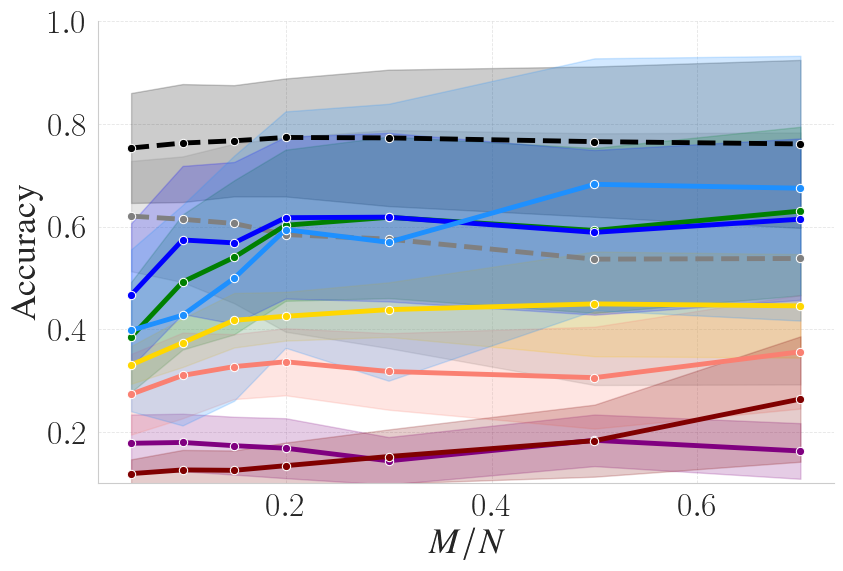

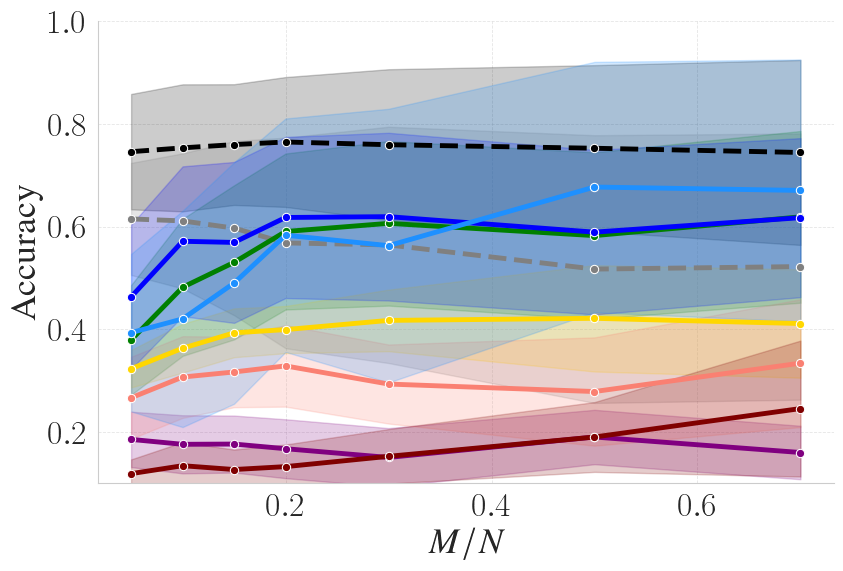

In [41]:
# Loop over each unique train_percent value
for dim in results_df['dim'].unique():
    # plt.rcParams['text.usetex'] = True
    # Filter the dataframe for the current train_percent value and selected methods 
    plt.figure(figsize=(9.5, 6))
    
    # Plot for reference methods with dashed lines
    df_filtered = results_df[(results_df['dim'] == dim) &
                             (results_df['method'].isin(reference_methods))]
    # df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
    ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                      marker='o', palette=palette_reference, linewidth=linewidth,
                      hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

    # Plot for competing methods
    df_filtered = results_df[(results_df['dim'] == dim) &
                             (results_df['method'].isin(competing_methods))]
    # df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
    ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                      marker='o', palette=palette_competing, linewidth=linewidth,
                      hue_order=competing_methods, estimator='mean', errorbar=errorbar)

    # Plot for our methods
    df_filtered = results_df[(results_df['dim'] == dim) &
                             (results_df['method'].isin(our_methods))]
    # df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
    ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                      marker='o', palette=palette_our_methods, linewidth=linewidth,
                      hue_order=our_methods, estimator='mean', errorbar=errorbar)
    
    # Modify the legend with custom names
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [method_names[label] for label in labels]
    plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='lower right', frameon=True, prop=font_properties)
    
    # Enhancing the plot
    # plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
    plt.xlabel(r'$M/N$', fontsize=label_fontsize)
    plt.ylabel(r'Accuracy', fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
    plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.set_ylim([0.1, 1.0])
    
    # Adding gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax.legend().set_visible(False)
    # Remove the top and right spines for a cleaner look
    sns.despine()
    # plt.rcParams['text.usetex'] = False
    path_str = f'{summary_path}/acc_vs_train_dim_{dim}'.replace('.', 'p')
    plt.savefig(f'{summary_path}/acc_vs_train_dim_{dim}.pdf', dpi=300, format='pdf', bbox_inches='tight')

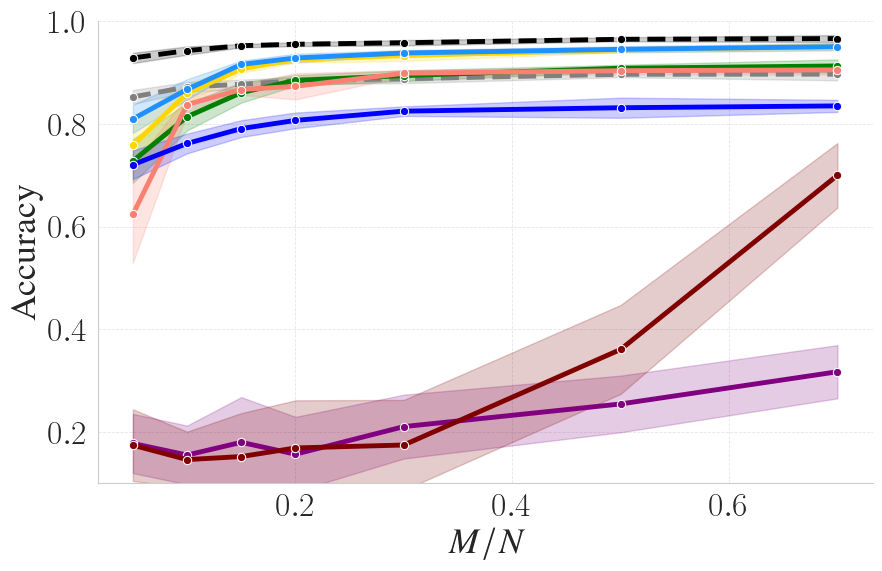

In [42]:
# create plot vs. train with the best dim 
# Loop over each unique train_percent value
# Filter the dataframe for the current train_percent value and selected methods 
plt.figure(figsize=(10, 6))
# calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(competing_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='lower right', frameon=True, prop=font_properties)

# Enhancing the plot
# plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
# plt.xlabel('Train Size[%]', fontsize=label_fontsize, fontproperties=font_properties)

plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([0.1, 1.0])

ax.legend().set_visible(False)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()
plt.savefig(f'{summary_path}/acc_vs_train_dim_best.pdf', dpi=300, format='pdf', bbox_inches='tight')

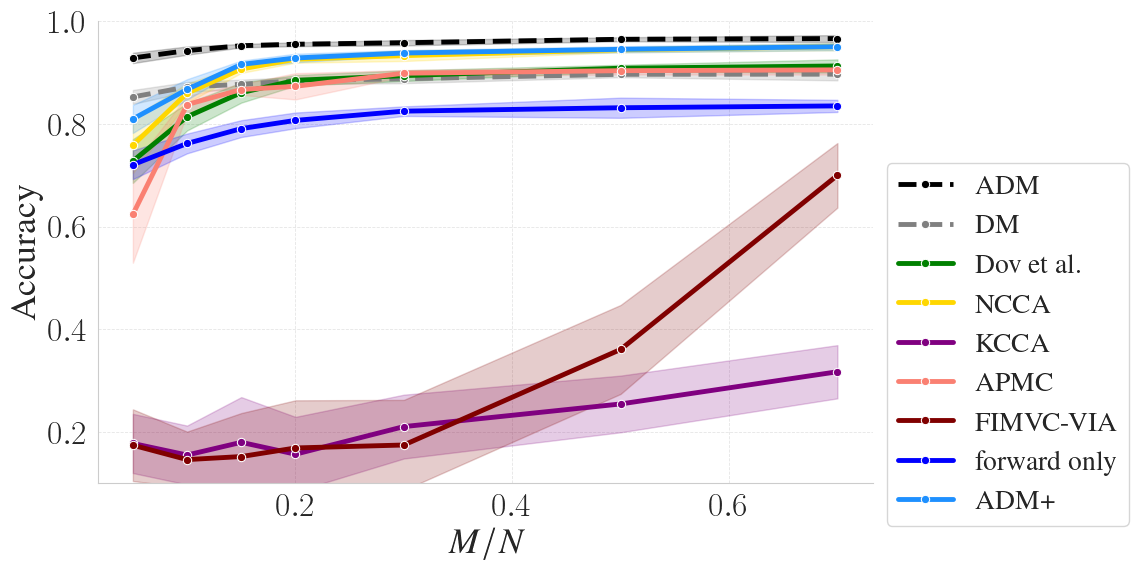

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(10, 6))

# Calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(competing_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names and place it outside the figure
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='center left', 
           bbox_to_anchor=(1, 0.3), frameon=True, prop=font_properties)

# Enhancing the plot
plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([0.1, 1.0])

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# # Create a zoomed-in inset in the bottom right corner
# ax_inset = inset_axes(ax, width="30%", height="40%", loc='lower right', bbox_to_anchor=(0.335, 0.63, 1, 0.8), bbox_transform=ax.transAxes)  # Adjust size and position
# ax_inset.set_xlim([0.05, 0.2])
# ax_inset.set_ylim([0.76, 0.93])
# ax_inset.grid(True, which='both', linestyle='--', linewidth=0.6)
# ax_inset.tick_params(axis='x', labelsize=20)
# ax_inset.tick_params(axis='y', labelsize=20)
# 
# # Plot the zoomed-in region
# sns.lineplot(data=df_max[df_max['method'].isin(reference_methods)], 
#              x='train_percent', y='test_accuracy', hue='method',
#              marker='o', ax=ax_inset, palette=palette_reference, linewidth=linewidth,
#              hue_order=reference_methods, estimator='mean', linestyle='dashed')
# sns.lineplot(data=df_max[df_max['method'].isin(competing_methods)], 
#              x='train_percent', y='test_accuracy', hue='method',
#              marker='o', ax=ax_inset, palette=palette_competing, linewidth=linewidth,
#              hue_order=competing_methods, estimator='mean')
# sns.lineplot(data=df_max[df_max['method'].isin(our_methods)], 
#              x='train_percent', y='test_accuracy', hue='method',
#              marker='o', ax=ax_inset, palette=palette_our_methods, linewidth=linewidth,
#              hue_order=our_methods, estimator='mean')
# 
# # Hide the legend and axis titles for the zoomed-in plot
# ax_inset.legend().set_visible(False)
# ax_inset.set_xlabel('')
# ax_inset.set_ylabel('')
# Save the plot
plt.savefig(f'{summary_path}/acc_vs_train_dim_best.pdf', dpi=300, format='pdf', bbox_inches='tight')

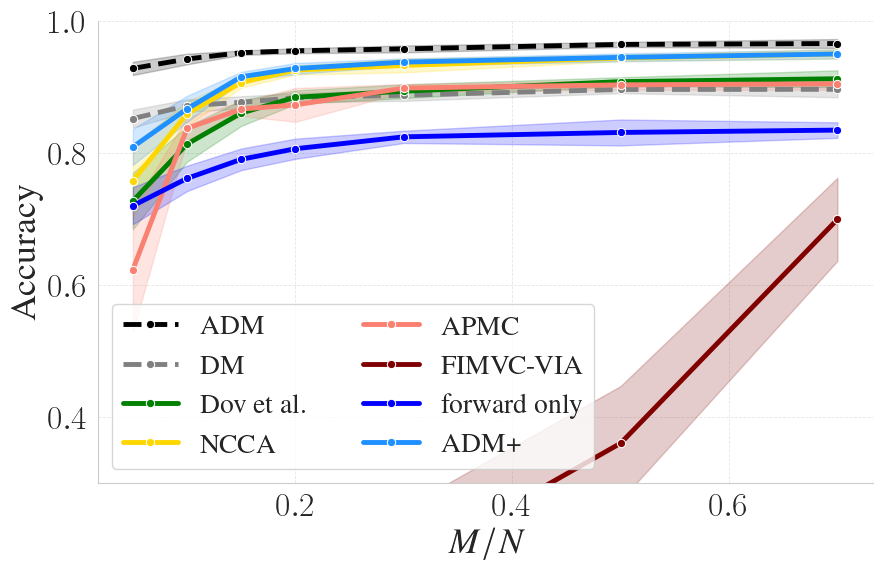

In [47]:
plt.figure(figsize=(10, 6))

# Calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(best_competing_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=best_competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
ax = sns.lineplot(data=df_filtered, x='train_percent', y='test_accuracy', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names and place it outside the figure
# handles, labels = plt.gca().get_legend_handles_labels()
# labels = [method_names[label] for label in labels]
# plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='center left', bbox_to_anchor=(1, 0.3), frameon=True, prop=font_properties)
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=26, fontsize=26, loc='best', frameon=True, prop=font_properties, ncol=2)

# Enhancing the plot
plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_ylim([0.3, 1.0])

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# Save the plot
plt.savefig(f'{summary_path}/acc_vs_train_dim_best_zoom.pdf', dpi=300, format='pdf', bbox_inches='tight')

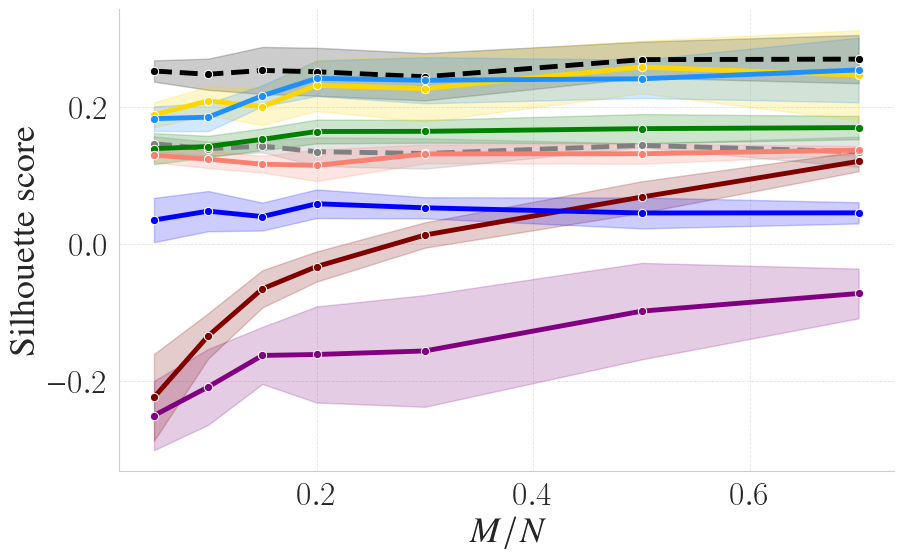

In [45]:
# create plot vs. train with the best dim 
# Loop over each unique train_percent value
# Filter the dataframe for the current train_percent value and selected methods 
plt.figure(figsize=(10, 6))
# calculate max value of dimensions
df_max = results_df.loc[results_df.groupby(['method', 'train_percent', 'seed'])['valid_accuracy'].idxmax()]

# Plot for reference methods with dashed lines
df_filtered = df_max[df_max['method'].isin(reference_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='silhouette_gt', hue='method',
                  marker='o', palette=palette_reference, linewidth=linewidth,
                  hue_order=reference_methods, estimator='mean', linestyle='dashed', errorbar=errorbar)

# Plot for competing methods
df_filtered = df_max[df_max['method'].isin(competing_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='silhouette_gt', hue='method',
                  marker='o', palette=palette_competing, linewidth=linewidth,
                  hue_order=competing_methods, estimator='mean', errorbar=errorbar)

# Plot for our methods
df_filtered = df_max[df_max['method'].isin(our_methods)]
# df_filtered['train_percent'] = df_filtered['train_percent'] * 100 
ax = sns.lineplot(data=df_filtered, x='train_percent', y='silhouette_gt', hue='method',
                  marker='o', palette=palette_our_methods, linewidth=linewidth,
                  hue_order=our_methods, estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, title_fontsize=22, fontsize=22, loc='lower right', frameon=True, prop=font_properties)

# Enhancing the plot
# plt.title(f'Accuracy vs Dim for each Method (train_percent={train_percent})', fontsize=16, weight='bold', fontproperties=font_properties)
# plt.xlabel('Train Size[%]', fontsize=label_fontsize, fontproperties=font_properties)

plt.xlabel(r'$M/N$', fontsize=label_fontsize)
plt.ylabel(r'Silhouette score', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)  # Increase x-tick fontsize
plt.yticks(fontsize=tick_fontsize)  # Increase y-tick fontsize
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)


ax.legend().set_visible(False)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()
plt.savefig(f'{summary_path}/silhouette_vs_train_dim_best.pdf', dpi=300, format='pdf', bbox_inches='tight')

# Hyperparameter sensitivity analysis

In [38]:
full_results_df = pd.read_csv(f'{figures_path}/results_merged.csv')

In [87]:
# Hyperparameter sensitivity: Accuracy vs. kernel_scale

# Specify parameters
train_percent_sensitivity = 0.5
methods_sensitivity = ['ncca', 'adm_plus', 'nystrom', 'apmc', 'ad']  

# For each method, find best dim and t based on validation accuracy
best_params = {}
for method in methods_sensitivity:
    df_method = full_results_df[(full_results_df['method'] == method) & 
                                 (full_results_df['train_percent'] == train_percent_sensitivity)]
    
    # Find best dim and t by maximizing validation accuracy
    best_idx = df_method.groupby(['seed'])['valid_accuracy'].idxmax()
    best_configs = df_method.loc[best_idx]
    
    # Get most common best dim and t (mode)
    best_dim = best_configs['dim'].mode()[0]
    best_t = best_configs['t'].mode()[0]
    
    best_params[method] = {'dim': best_dim, 't': best_t}
    print(f"{method}: best_dim={best_dim}, best_t={best_t}")

best_params

ncca: best_dim=10, best_t=0.0
adm_plus: best_dim=15, best_t=0.1
nystrom: best_dim=15, best_t=0.5
apmc: best_dim=20, best_t=0.0
ad: best_dim=10, best_t=0.2


{'ncca': {'dim': 10, 't': 0.0},
 'adm_plus': {'dim': 15, 't': 0.1},
 'nystrom': {'dim': 15, 't': 0.5},
 'apmc': {'dim': 20, 't': 0.0},
 'ad': {'dim': 10, 't': 0.2}}

In [72]:
full_results_df['param1'].value_counts()

param1
0.5     32760
0.1     32760
10.0    32760
1.0     32760
2.0     32760
Name: count, dtype: int64

In [88]:
# Prepare data for plotting
sensitivity_data = []

for method in methods_sensitivity:
    dim = best_params[method]['dim']
    t = best_params[method]['t']
    
    df_filtered = full_results_df[
        (full_results_df['method'] == method) &
        (full_results_df['train_percent'] == train_percent_sensitivity) &
        (full_results_df['dim'] == dim) &
        (full_results_df['t'] == t)
    ]
    
    sensitivity_data.append(df_filtered)

sensitivity_df = pd.concat(sensitivity_data, ignore_index=True)

# Use param1 as kernel_scale (assuming param1 = kernel_scale1)
sensitivity_df['kernel_scale'] = sensitivity_df['param1']

print(f"Available kernel scales: {sorted(sensitivity_df['kernel_scale'].unique())}")
sensitivity_df.head()

Available kernel scales: [0.1, 0.5, 1.0, 2.0, 10.0]


method  param1  param2  dim    t  train_percent  batch_size  batch  seed  \
0   ncca     0.5     0.5   10  0.0            0.5        4554      0     0   
1   ncca     0.5     0.5   10  0.0            0.5        4554      0     3   
2   ncca     0.5     0.5   10  0.0            0.5        4554      0    14   
3   ncca     0.5     0.5   10  0.0            0.5        4554      0    35   
4   ncca     0.5     0.5   10  0.0            0.5        4554      0    61   

   zero_diag classifier  shuffle_subjects  valid_accuracy  test_accuracy  \
0      False        knn              True        0.925275       0.933041   
1      False        knn              True        0.898901       0.908891   
2      False        knn              True        0.927473       0.936334   
3      False        knn              True        0.929670       0.925357   
4      False        knn              True        0.916484       0.915477   

   silhouette_gt  silhouette_pred_test  run_time  kernel_scale  
0       0.304536              0.296753  6.602914           0.5  
1       0.262201              0.260440  6.602914           0.5  
2       0.300979              0.287503  6.602914           0.5  
3       0.269588              0.261339  6.602914           0.5  
4       0.253021              0.267381  6.602914           0.5

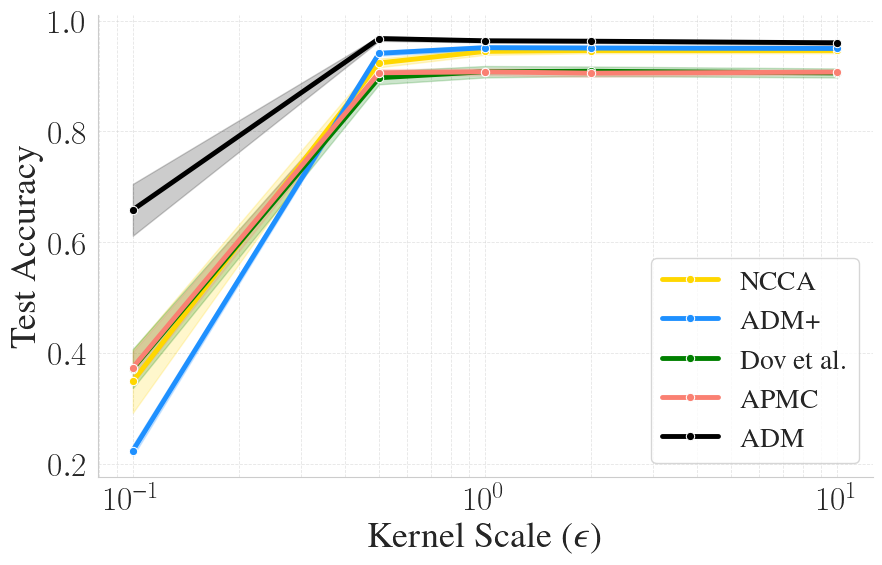

In [99]:
# Plot accuracy vs. kernel_scale
plt.figure(figsize=(10, 6))

# Define colors for methods
palette_sensitivity = {
    'ncca': palette_competing['ncca'],
    'adm_plus': palette_our_methods['adm_plus'],
    'nystrom': palette_competing['nystrom'],
    'apmc': palette_competing['apmc'],
    'forward_only': palette_our_methods['forward_only'],
    'ad': palette_reference['ad'],
}

# Plot with error bars (std)
ax = sns.lineplot(data=sensitivity_df, x='kernel_scale', y='test_accuracy', 
                  hue='method', marker='o', palette=palette_sensitivity,
                  linewidth=linewidth, hue_order=methods_sensitivity, 
                  estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, fontsize=legend_fontsize, loc='best', frameon=True, prop=font_properties)

# Enhancing the plot
plt.xlabel(r'Kernel Scale ($\epsilon$)', fontsize=label_fontsize)
plt.ylabel(r'Test Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)

# Use log scale for x-axis if scales vary widely
ax.set_xscale('log')

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# Save the plot
plt.savefig(f'{summary_path}/kernel_scale_sensitivity_train_{train_percent_sensitivity}.pdf', 
           dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
results_df.groupby('method').max('accuracy')

kernel_scale1  kernel_scale2  dim    t  train_percent  \
method                                                                 
ad                       2.0            2.0  100  1.0            0.7   
adm_plus                 2.0            2.0  100  0.5            0.7   
apmc                     2.0            2.0  100  0.0            0.7   
backward_only            2.0            2.0  100  0.3            0.7   
dm                       2.0            2.0  100  2.0            0.7   
forward_only             2.0            2.0  100  0.3            0.7   
kcca                     2.0            2.0  100  0.0            0.7   
kcca_impute              2.0            2.0  100  0.0            0.7   
ncca                     2.0            2.0  100  0.0            0.7   
nystrom                  2.0            2.0  100  2.0            0.7   

               batch_size  batch  seed  zero_diag  shuffle_subjects  \
method                                                                
ad                   4554      0   123      False              True   
adm_plus             4554      0   123      False              True   
apmc                 4554      0   123      False              True   
backward_only        4554      0   123      False              True   
dm                   4554      0   123      False              True   
forward_only         4554      0   123      False              True   
kcca                 4554      0   123      False              True   
kcca_impute          4554      0   123      False              True   
ncca                 4554      0   123      False              True   
nystrom              4554      0   123      False              True   

               valid_accuracy  test_accuracy  silhouette_gt  \
method                                                        
ad                   0.989011       0.975851       0.315223   
adm_plus             0.975824       0.963776       0.321210   
apmc                 0.931868       0.919868       0.159159   
backward_only        0.870330       0.855104       0.099035   
dm                   0.931868       0.912184       0.161613   
forward_only         0.870330       0.858397       0.112199   
kcca                 0.674725       0.653677       0.120009   
kcca_impute          0.417582       0.402854       0.084937   
ncca                 0.967033       0.961581       0.320638   
nystrom              0.940659       0.934138       0.242827   

               silhouette_pred_test  
method                               
ad                         0.320439  
adm_plus                   0.310341  
apmc                       0.290687  
backward_only              0.107295  
dm                         0.170162  
forward_only               0.121961  
kcca                       0.954006  
kcca_impute                0.957328  
ncca                       0.326205  
nystrom                    0.237938

## Embedding Dimension Sensitivity

In [96]:
# Embedding dimension sensitivity for ADM+ and Nyström
# Using best kernel_scale and t for each method

methods_dim_sensitivity = ['adm_plus', 'nystrom', 'ad', 'forward_only', 'ncca']  # Methods to analyze for dimension sensitivity

# For each method, find best kernel_scale and t
best_params_dim = {}
for method in methods_dim_sensitivity:
    df_method = full_results_df[(full_results_df['method'] == method) & 
                                 (full_results_df['train_percent'] == train_percent_sensitivity)]
    
    # Find best kernel_scale and t by maximizing validation accuracy
    best_idx = df_method.groupby(['seed'])['valid_accuracy'].idxmax()
    best_configs = df_method.loc[best_idx]
    
    # Get most common best kernel_scale and t (mode)
    best_scale = best_configs['param1'].mode()[0]
    best_t = best_configs['t'].mode()[0]
    
    best_params_dim[method] = {'kernel_scale': best_scale, 't': best_t}
    print(f"{method}: best_kernel_scale={best_scale}, best_t={best_t}")

best_params_dim

adm_plus: best_kernel_scale=10.0, best_t=0.1
nystrom: best_kernel_scale=2.0, best_t=0.5
ad: best_kernel_scale=0.5, best_t=0.2
forward_only: best_kernel_scale=0.5, best_t=0.1
ncca: best_kernel_scale=1.0, best_t=0.0


{'adm_plus': {'kernel_scale': 10.0, 't': 0.1},
 'nystrom': {'kernel_scale': 2.0, 't': 0.5},
 'ad': {'kernel_scale': 0.5, 't': 0.2},
 'forward_only': {'kernel_scale': 0.5, 't': 0.1},
 'ncca': {'kernel_scale': 1.0, 't': 0.0}}

In [97]:
# Prepare data for dimension sensitivity plot
dim_sensitivity_data = []

for method in methods_dim_sensitivity:
    kernel_scale = best_params_dim[method]['kernel_scale']
    t = best_params_dim[method]['t']
    
    df_filtered = full_results_df[
        (full_results_df['method'] == method) &
        (full_results_df['train_percent'] == train_percent_sensitivity) &
        (full_results_df['param1'] == kernel_scale) &
        (full_results_df['t'] == t)
    ]
    
    dim_sensitivity_data.append(df_filtered)

dim_sensitivity_df = pd.concat(dim_sensitivity_data, ignore_index=True)

print(f"Available dimensions: {sorted(dim_sensitivity_df['dim'].unique())}")
dim_sensitivity_df.head()

Available dimensions: [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]


method  param1  param2  dim    t  train_percent  batch_size  batch  seed  \
0  adm_plus    10.0    10.0    5  0.1            0.5        4554      0     0   
1  adm_plus    10.0    10.0   10  0.1            0.5        4554      0     0   
2  adm_plus    10.0    10.0   15  0.1            0.5        4554      0     0   
3  adm_plus    10.0    10.0   20  0.1            0.5        4554      0     0   
4  adm_plus    10.0    10.0   30  0.1            0.5        4554      0     0   

   zero_diag classifier  shuffle_subjects  valid_accuracy  test_accuracy  \
0      False        knn              True        0.795604       0.794731   
1      False        knn              True        0.945055       0.944566   
2      False        knn              True        0.947253       0.957739   
3      False        knn              True        0.949451       0.942371   
4      False        knn              True        0.936264       0.931394   

   silhouette_gt  silhouette_pred_test  run_time  
0       0.249391              0.240444  8.350019  
1       0.290794              0.281159  8.350019  
2       0.239741              0.234125  8.350019  
3       0.205723              0.203347  8.350019  
4       0.165436              0.165185  8.350019

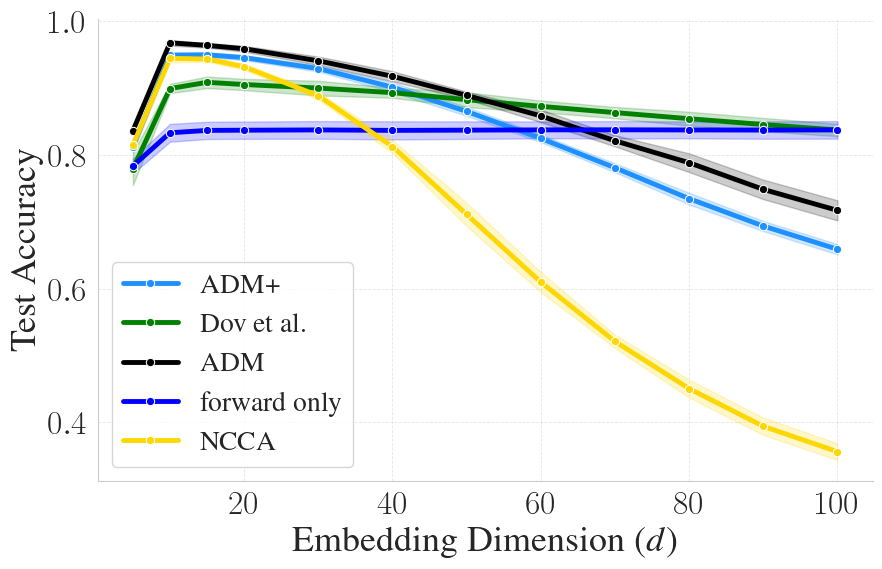

In [98]:
# Plot accuracy vs. embedding dimension
plt.figure(figsize=(10, 6))

# Plot with error bars (std)
ax = sns.lineplot(data=dim_sensitivity_df, x='dim', y='test_accuracy', 
                  hue='method', marker='o', palette=palette_sensitivity,
                  linewidth=linewidth, hue_order=methods_dim_sensitivity, 
                  estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, fontsize=legend_fontsize, loc='best', frameon=True, prop=font_properties)

# Enhancing the plot
plt.xlabel(r'Embedding Dimension ($d$)', fontsize=label_fontsize)
plt.ylabel(r'Test Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# Save the plot
plt.savefig(f'{summary_path}/dim_sensitivity_train_{train_percent_sensitivity}.pdf', 
           dpi=300, format='pdf', bbox_inches='tight')
plt.show()

## t Parameter Sensitivity for ADM+

In [93]:
# t parameter sensitivity for ADM+ and Nyström
# Using best kernel_scale and dim for each method

methods_t_sensitivity = ['adm_plus', 'nystrom', 'ad', 'forward_only']  # Methods to analyze for t sensitivity

# For each method, find best dim and kernel_scale
best_params_t = {}
for method in methods_t_sensitivity:
    df_method = full_results_df[(full_results_df['method'] == method) & 
                                 (full_results_df['train_percent'] == train_percent_sensitivity)]
    
    # Find best dim and kernel_scale by maximizing validation accuracy
    best_idx = df_method.groupby(['seed'])['valid_accuracy'].idxmax()
    best_configs = df_method.loc[best_idx]
    
    # Get most common best dim and kernel_scale (mode)
    best_dim = best_configs['dim'].mode()[0]
    best_scale = best_configs['param1'].mode()[0]
    
    best_params_t[method] = {'dim': best_dim, 'kernel_scale': best_scale}
    print(f"{method}: best_dim={best_dim}, best_kernel_scale={best_scale}")

best_params_t

adm_plus: best_dim=15, best_kernel_scale=10.0
nystrom: best_dim=15, best_kernel_scale=2.0
ad: best_dim=10, best_kernel_scale=0.5
forward_only: best_dim=10, best_kernel_scale=0.5


{'adm_plus': {'dim': 15, 'kernel_scale': 10.0},
 'nystrom': {'dim': 15, 'kernel_scale': 2.0},
 'ad': {'dim': 10, 'kernel_scale': 0.5},
 'forward_only': {'dim': 10, 'kernel_scale': 0.5}}

In [94]:
# Prepare data for t sensitivity plot
t_sensitivity_data = []

for method in methods_t_sensitivity:
    dim = best_params_t[method]['dim']
    kernel_scale = best_params_t[method]['kernel_scale']
    
    df_filtered = full_results_df[
        (full_results_df['method'] == method) &
        (full_results_df['train_percent'] == train_percent_sensitivity) &
        (full_results_df['dim'] == dim) &
        (full_results_df['param1'] == kernel_scale)
    ]
    
    t_sensitivity_data.append(df_filtered)

t_sensitivity_df = pd.concat(t_sensitivity_data, ignore_index=True)

print(f"Available t values: {sorted(t_sensitivity_df['t'].unique())}")
t_sensitivity_df.head()

Available t values: [0.1, 0.2, 0.3, 0.5, 1.0, 2.0]


method  param1  param2  dim    t  train_percent  batch_size  batch  seed  \
0  adm_plus    10.0    10.0   15  0.1            0.5        4554      0     0   
1  adm_plus    10.0    10.0   15  0.2            0.5        4554      0     0   
2  adm_plus    10.0    10.0   15  0.3            0.5        4554      0     0   
3  adm_plus    10.0    10.0   15  0.5            0.5        4554      0     0   
4  adm_plus    10.0    10.0   15  1.0            0.5        4554      0     0   

   zero_diag classifier  shuffle_subjects  valid_accuracy  test_accuracy  \
0      False        knn              True        0.947253       0.957739   
1      False        knn              True        0.942857       0.955543   
2      False        knn              True        0.940659       0.936334   
3      False        knn              True        0.835165       0.841383   
4      False        knn              True        0.687912       0.693743   

   silhouette_gt  silhouette_pred_test  run_time  
0       0.239741              0.234125  8.350019  
1       0.235761              0.227203  8.350019  
2       0.178527              0.175208  8.350019  
3       0.046692              0.049843  8.350019  
4      -0.090102             -0.093248  8.350019

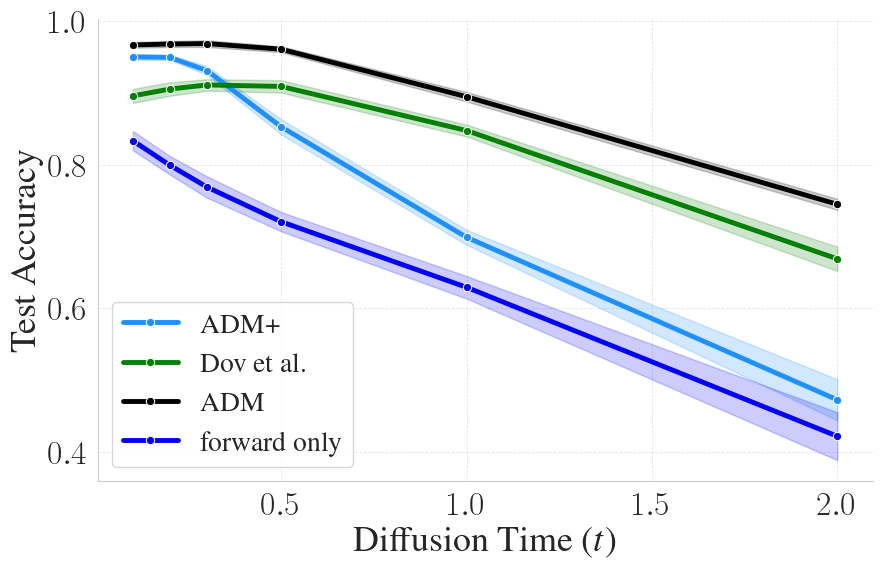

In [95]:
# Plot accuracy vs. t parameter
plt.figure(figsize=(10, 6))

# Plot with error bars (std)
ax = sns.lineplot(data=t_sensitivity_df, x='t', y='test_accuracy', 
                  hue='method', marker='o', palette=palette_sensitivity,
                  linewidth=linewidth, hue_order=methods_t_sensitivity, 
                  estimator='mean', errorbar=errorbar)

# Modify the legend with custom names
handles, labels = plt.gca().get_legend_handles_labels()
labels = [method_names[label] for label in labels]
plt.legend(handles, labels, fontsize=legend_fontsize, loc='best', frameon=True, prop=font_properties)

# Enhancing the plot
plt.xlabel(r'Diffusion Time ($t$)', fontsize=label_fontsize)
plt.ylabel(r'Test Accuracy', fontsize=label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Remove the top and right spines for a cleaner look
sns.despine()

# Save the plot
plt.savefig(f'{summary_path}/t_sensitivity_train_{train_percent_sensitivity}.pdf', 
           dpi=300, format='pdf', bbox_inches='tight')
plt.show()

# tSNE plots

In [35]:
def get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path):
    selected_df = results_df[(results_df['dim'] == dim) & (results_df['method'] == method) & 
                             (results_df['train_percent'] == train_percent) & (results_df['seed'] == seed)]
    t = selected_df['t'].values[0]
    scale1 = selected_df['kernel_scale1'].values[0]
    # convert to int format for display
    scale1 = scale1 if scale1 != int(scale1) else int(scale1)
    scale2 = selected_df['kernel_scale2'].values[0]
    scale2 = scale2 if scale2 != int(scale2) else int(scale2)
    batch = selected_df['batch'].values[0]
    directory = f'batch_{batch}_method_{method}_s1_{scale1}_s2_{scale2}_train_percent_{train_percent}'.replace('.', 'p')
    with open(f'{figures_path}/{directory}/data_seed_{seed}.pkl', 'rb') as fp:
        embed_data = pickle.load(fp)
    vecs = embed_data['vecs']
    vals = embed_data['vals']
    if method in {'ncca', 'kcca'}:
        embed = vecs[:, :dim]
    else:
        embed = np.real((vals[1:dim + 1] ** t) * vecs[:, 1:dim + 1])
    ref_indicator = embed_data['ref_indicator']
    labels = embed_data['labels_batch']
    tasks_list = embed_data['tasks_list']
    return embed, ref_indicator, labels, tasks_list, selected_df

In [26]:
# plotting parameters
show_legend = False
point_size = 10
fontsize = 24
figsize = (8, 7)
seed = 0
train_percent = 0.3
train_percent_str = f'{train_percent}'.replace('.', 'p')

In [27]:
from helper_functions.plotting_funcs import plot_embed_tsne
dim = 20
method = 'adm_plus'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne_tpercent_{train_percent_str}.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

KeyError: 'kernel_scale1'

method  kernel_scale1  kernel_scale2  dim    t  train_percent  \
8070   ncca           10.0           10.0   20  0.0            0.3   

      batch_size  batch  seed  zero_diag  solver classifier  shuffle_subjects  \
8070        4554      0     0      False  arpack        knn              True   

      valid_accuracy  test_accuracy  silhouette_gt  silhouette_pred_test  
8070        0.925275       0.913282       0.149757              0.142384

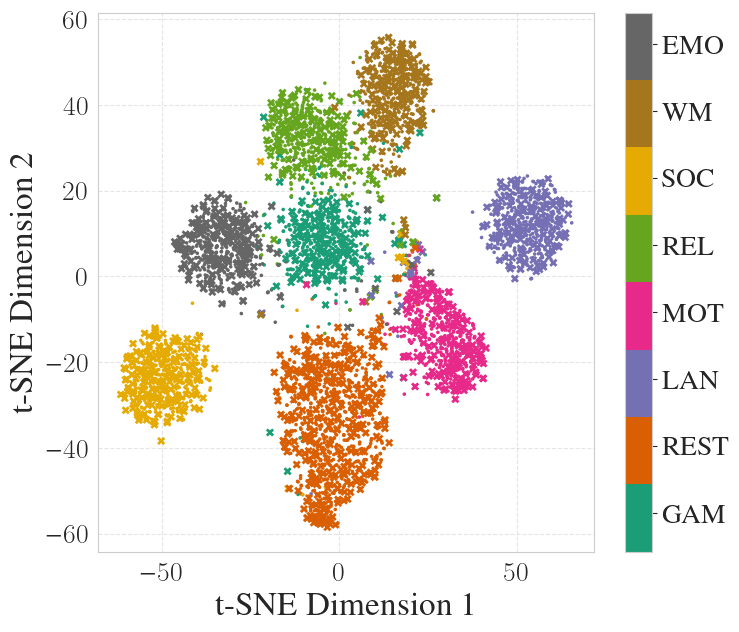

In [ ]:
dim = 20
method = 'ncca'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne_tpercent_{train_percent_str}.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

method  kernel_scale1  kernel_scale2  dim    t  train_percent  batch_size  \
510     ad            0.5            0.5   20  0.2            0.3        4554   

     batch  seed  zero_diag  solver classifier  shuffle_subjects  \
510      0     0      False  arpack        knn              True   

     valid_accuracy  test_accuracy  silhouette_gt  silhouette_pred_test  
510        0.964835       0.961581       0.189416               0.18645

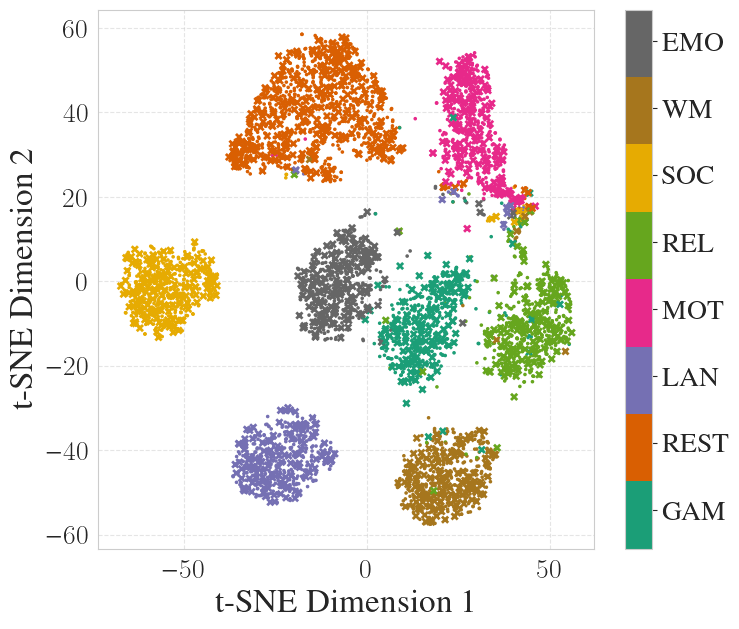

In [ ]:
dim = 20
method = 'ad'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

method  kernel_scale1  kernel_scale2  dim    t  train_percent  \
8910  nystrom           10.0           10.0   20  0.5            0.3   

      batch_size  batch  seed  zero_diag  solver classifier  shuffle_subjects  \
8910        4554      0     0      False  arpack        knn              True   

      valid_accuracy  test_accuracy  silhouette_gt  silhouette_pred_test  
8910        0.918681       0.905232       0.166127              0.161411

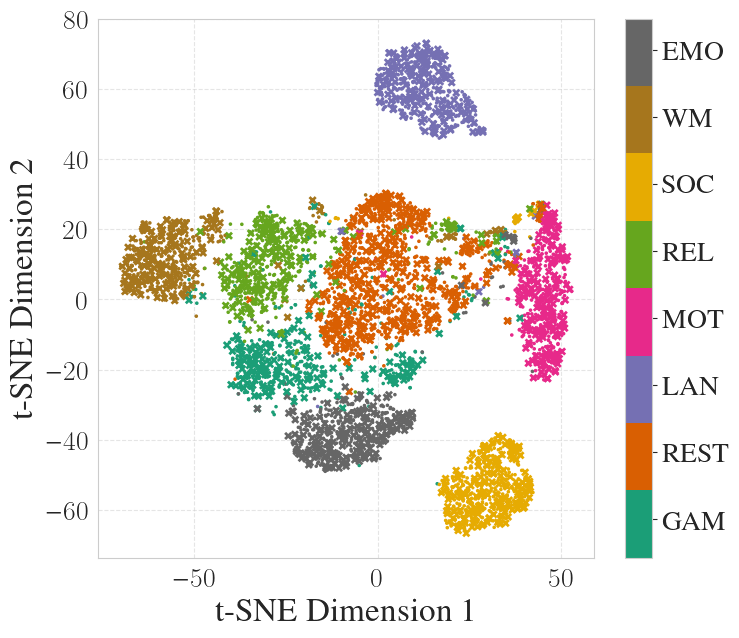

In [ ]:
dim = 20
method = 'nystrom'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, train_percent, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df

method  kernel_scale1  kernel_scale2  dim    t  train_percent  \
3510  backward_only           10.0           10.0   20  0.1            0.1   

      batch_size  batch  seed  zero_diag  solver classifier  shuffle_subjects  \
3510        4554      0     0      False  arpack        knn              True   

      valid_accuracy  test_accuracy  silhouette_gt  silhouette_pred_test  
3510        0.797802       0.779363       0.085518              0.097853

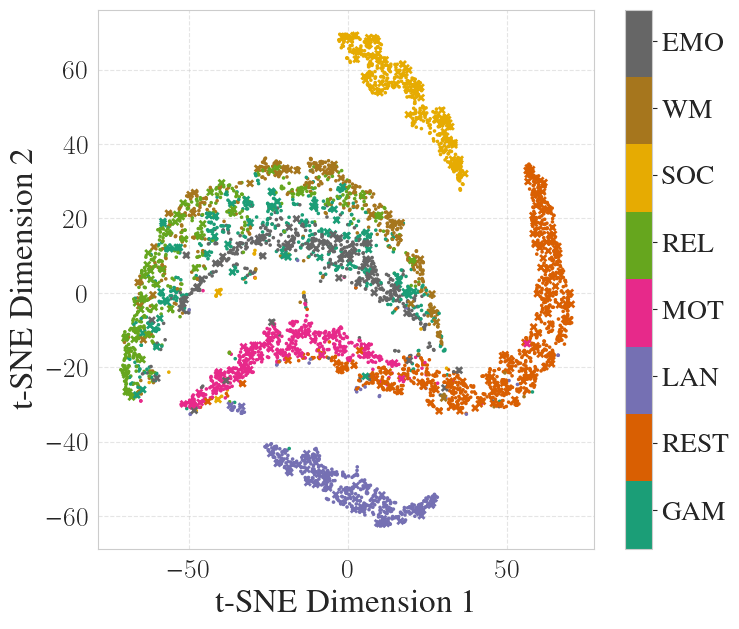

In [ ]:
dim = 20
method = 'backward_only'

embed, ref_indicator, labels, tasks_list, selected_df = get_embed_from_path(dim, 0.1, method, seed, results_df, figures_path)
plot_embed_tsne(embed, title=None, colors=labels, ref_indicator=ref_indicator, color_labels=tasks_list, show_legend=show_legend, point_size=point_size, fontsize=fontsize, font_properties=font_properties, figsize=figsize)
plt.savefig(f'{summary_path}/{method}_tsne.pdf', dpi=300, format='pdf', bbox_inches='tight')
selected_df